## Notebook set up

Submit your notebook to the class leaderboard on HuggingFace at [huggingface.co/spaces/gperdrizet/leaderboard](https://huggingface.co/spaces/gperdrizet/leaderboard)

**Your task**: Apply at least two different feature engineering techniques to the `housing_df` dataframe to improve the dataset. At the end of the notebook, your engineered dataset and the original dataset will be used to train a linear regression model to predict `MedHouseVal`. Your goal is to achieve better model performance via feature engineering.

Don't change any of the code in the Model evaluation section of the notebook, especially the output saving. Otherwise the leaderboard scoring may not work!

**Note**: If you have read ahead or you are familiar with the basics of training ML models, no there is no train-test split and yes, this means data leakage/genralizability is a concern. We will cover those topics in the next unit. For now, the goal is to keep things simple while still giving you an idea of how your feature engineering effects model performance.

Before applying transformations, explore the dataset to understand what techniques would be most beneficial.

### Import libraries

In [190]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Set random seed for reproducibility
np.random.seed(315)

### Load dataset

In [191]:
# Load California housing dataset
original_housing_df = pd.read_csv('https://gperdrizet.github.io/FSA_devops/assets/data/unit2/california_housing.csv')
housing_df = original_housing_df.copy()

## Task 1: Explore the dataset

Before deciding what feature engineering techniques to apply, explore the dataset to understand its characteristics.

**Things to investigate**:
- Display basic information about the dataset (`.info()`, `.describe()`)
- Check for missing values
- Examine feature distributions (histograms, box plots)
- Look at feature scales and ranges

Use this exploration to inform your feature engineering decisions in the following tasks.

In [192]:
# YOUR CODE HERE
housing_df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [193]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [194]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [195]:
# missing values

mising_values = housing_df.isna().sum()
mising_values


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [196]:
skewness_for_all=housing_df.skew().sort_values(ascending=False)

skewness_for_all

AveOccup       97.639561
AveBedrms      31.316956
AveRooms       20.697869
Population      4.935858
MedInc          1.646657
MedHouseVal     0.977763
Latitude        0.465953
HouseAge        0.060331
Longitude      -0.297801
dtype: float64

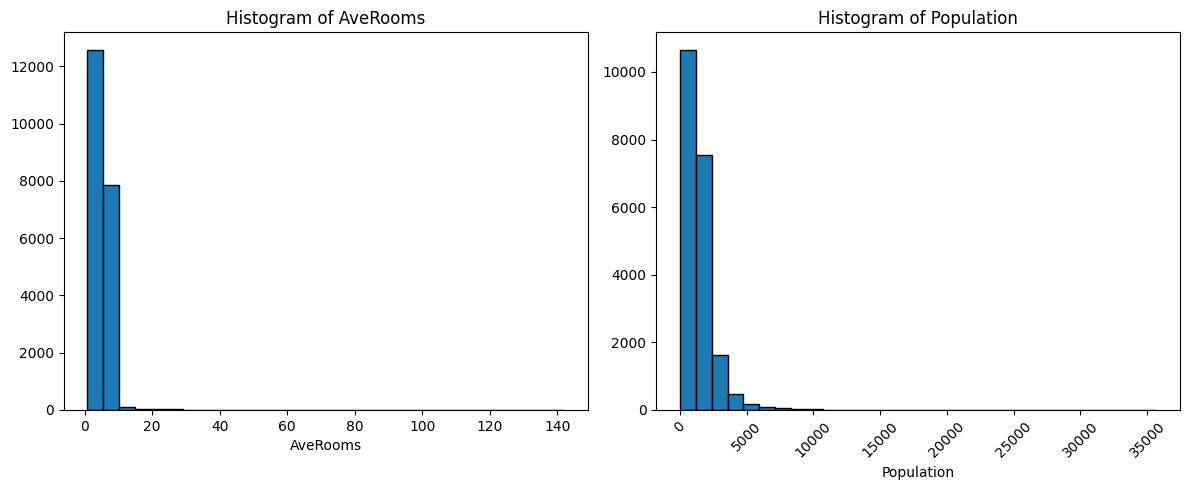

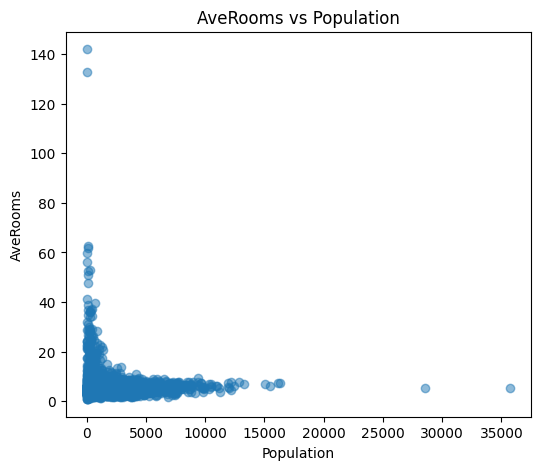

In [197]:
# eximine feature distribution

fig, axes = plt.subplots(1,2, figsize=(12,5))

# AveRooms
skew_rooms = housing_df['AveRooms'].skew()
axes[0].hist(housing_df['AveRooms'], bins=30, edgecolor='black')
axes[0].set_title('Histogram of AveRooms')
axes[0].set_xlabel('AveRooms')


# Population
axes[1].hist(housing_df['Population'], bins=30, edgecolor='black')
axes[1].set_title('Histogram of Population')
axes[1].set_xlabel('Population')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Scatter plot for relationship
plt.figure(figsize=(6,5))
plt.scatter(housing_df['Population'], housing_df['AveRooms'], alpha=0.5)
plt.xlabel('Population')
plt.ylabel('AveRooms')
plt.title('AveRooms vs Population')
plt.show()

In [198]:
housing_df['AveRooms'].corr(housing_df['Population'])


np.float64(-0.07221284865893352)

## Task 2: Apply your first feature engineering technique

Based on your exploration, apply your first feature engineering technique.

**Example approaches**:
- Transform skewed features using log, sqrt, power, or quantile transformations
- Create bins/categories from continuous variables
- Create interaction features (e.g., rooms per household = total rooms / households)

In [199]:
# YOUR CODE HERE

housing_df['AveOccup_log'] = np.log1p(housing_df['AveOccup'])
housing_df['AveRooms_log'] = np.log1p(housing_df['AveRooms'])
housing_df['Population_log'] = np.log1p(housing_df['Population'])
housing_df['MedInc_log'] = np.log1p(housing_df['MedInc'])



In [200]:
# Craeating bins/categoris from continues variables

bins_categories = housing_df.copy()

bins_categories['PopulationGroup'] = pd.cut(
    housing_df['Population_log'],
    bins=5,
    include_lowest=True
)

# PopulationGroup → Interval (for analysis, visualization, grouping)
# PopulationGroup_code → numeric (0,1,2,3,4) → usable in ML model
# housing_df['PopulationGroup_code'] = housing_df['PopulationGroup'].cat.codes



In [201]:
housing_df['BedRoomRatio'] = housing_df['AveBedrms'] / housing_df['AveRooms']


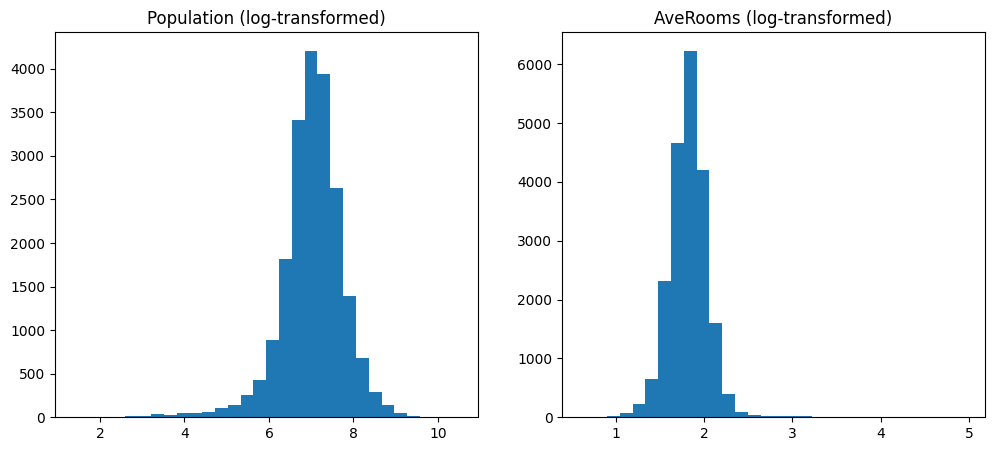

In [202]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(housing_df['Population_log'], bins=30)
plt.title('Population (log-transformed)')

plt.subplot(1,2,2)
plt.hist(housing_df['AveRooms_log'], bins=30)
plt.title('AveRooms (log-transformed)')

plt.show()


## Task 3: Apply your second feature engineering technique

**Example approaches**:
- Scale features to similar ranges
- Encode any categorical variables you created
- Create aggregate statistics by groups

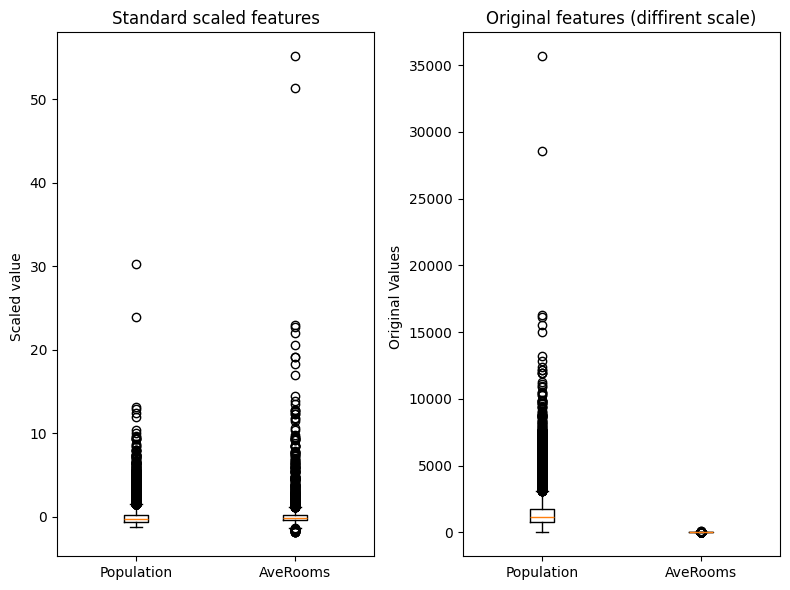

In [203]:
# YOUR CODE HERE
from sklearn.preprocessing import (
    PowerTransformer,
    QuantileTransformer,
    MinMaxScaler,
    StandardScaler,
    OrdinalEncoder,
    OneHotEncoder
)
from sklearn.feature_extraction import FeatureHasher

# Most machine learning algorithms use distance calculations:
# KNN
# K-means
# Logistic Regression
# Linear Regression
# SVM
# Neural Networks
# These models look at how “far apart” values are.
# Without scaling:
# Population = 30,000
# AveRooms = 3
# The model sees:
# “Population is 10,000 times larger → must be more important!”
# This is false, but the model gets misled by the large numbers.

# Visual Example (Simple)
# Before scaling:
# Value	Population	AveRooms
# Example	30,000	3

# Population is HUGE → dominates calculations.

# After scaling:
# Value	Population_scaled	AveRooms_scaled
# Example	0.85	-1.20

features_to_scale = ['Population', 'AveRooms']
scaler = StandardScaler()

df_standard = pd.DataFrame(
    scaler.fit_transform(housing_df[features_to_scale]),
    columns=[f'{col}_minmax' for col in housing_df[features_to_scale] ],
    index=housing_df.index
)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(8, 6))


axes[0].set_title('Standard scaled features')
axes[0].boxplot([df_standard[col] for col in df_standard.columns], tick_labels=features_to_scale)
axes[0].set_ylabel('Scaled value ')

axes[1].set_title('Original features (diffirent scale)')
axes[1].boxplot([housing_df[col] for col in features_to_scale], tick_labels = features_to_scale)
axes[1].set_ylabel('Original Values ')


plt.tight_layout()
plt.show()

In [204]:
# encode any categorical variabler you created
housing_df['HouseAge'].describe() # max 52

hosuing1_df = housing_df.copy()
# You first convert numeric ages → human categories
bins = [0, 10, 25, 40,hosuing1_df['HouseAge'].max()+1]
labels = ['New', 'Moderate', 'Old', 'Very old']

# pd.cut() = converting raw ages into labels
# like converting "age = 5" → "New",
# "age = 25" → "Old".

hosuing1_df['HouseAge_Category'] = pd.cut(
   hosuing1_df['HouseAge'],
    bins=bins,
    labels=labels,
    right=False
)



# OrdinalEncoder now receives strings like "New", not numbers

categories_1 = [['New','Moderate', 'Old', 'Very old']]

# Applying ordinal encoding
# OrdinalEncoder = converting those labels into numbers
# THEN you encode those categories → numeric codes
# like:
# new → 0
# Moderate → 1
# Old → 2
encoder = OrdinalEncoder(categories=categories_1)
hosuing1_df['HouseAge_encoded'] = encoder.fit_transform(hosuing1_df[['HouseAge_Category']])

# Displaying mapping
print('Ordinal encoding mapping :')
hosuing1_df[['HouseAge_Category', 'HouseAge_encoded']].drop_duplicates().sort_values('HouseAge_encoded')

Ordinal encoding mapping :


,HouseAge_Category,HouseAge_encoded
59,New,0.0
1,Moderate,1.0
70,Old,2.0
0,Very old,3.0


In [205]:
# Create aggregate satatics by groups
housing_df.head(10)

# I decide this bins base on outcome from "housing_df['Population'].describe()"
# so i get "quartiles"number starting from min,[25%, 50%, 75%, bit mor then 75%,  then max ] 

bins = [3, 787, 1166, 1725, 5000, 40000]


grouped_stats = housing_df.groupby(pd.cut(housing_df['Population'], bins=bins,include_lowest=True))['MedHouseVal'].agg([
    'mean',
    'median',
    'std',
    'min',
    'max',
    'count'
]).round(2)

print('MedHouse Value statistics by Population')
print(grouped_stats)

MedHouse Value statistics by Population
                   mean  median   std   min  max  count
Population                                             
(2.999, 787.0]     2.12    1.79  1.29  0.15  5.0   5164
(787.0, 1166.0]    2.12    1.85  1.20  0.27  5.0   5161
(1166.0, 1725.0]   2.03    1.78  1.11  0.22  5.0   5159
(1725.0, 5000.0]   2.00    1.78  0.99  0.38  5.0   4851
(5000.0, 40000.0]  2.02    1.80  0.92  0.22  5.0    305


/var/folders/jf/8gpbpnm56tvbxy24tplw57g80000gn/T/ipykernel_75568/663618231.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = housing_df.groupby(pd.cut(housing_df['Population'], bins=bins,include_lowest=True))['MedHouseVal'].agg([


## (Optional) Additional feature engineering

Add more techniques if you'd like to experiment further.

In [206]:
# YOUR CODE HERE (optional)


## Model evaluation

Now we'll compare model performance on the original dataset versus your engineered dataset.

### Evaluate datasets

In [207]:
# Create output directory if it doesn't exist
output_directory = 'data/outputs'
Path(output_directory).mkdir(parents=True, exist_ok=True)

# Save a copy of the engineered dataframe
housing_df.to_csv('data/outputs/housing_df.csv', index=False)

In [208]:
# Create linear regression model
model = LinearRegression()

# Evaluate on original dataset
scores_original = cross_val_score(
    model,
    original_housing_df.drop('MedHouseVal', axis=1),
    original_housing_df['MedHouseVal'],
    cv=10,
    scoring='r2'
)

# Evaluate on engineered dataset
scores_engineered = cross_val_score(
    model,
    housing_df.drop('MedHouseVal', axis=1),
    housing_df['MedHouseVal'],
    cv=10,
    scoring='r2'
)

engineered_mean = scores_engineered.mean()
original_mean = scores_original.mean()
mean_improvement = (engineered_mean - original_mean) / original_mean

print(f'\nMean improvement: {mean_improvement:.2f}%')


Mean improvement: 0.10%


### Visualize model performance comparison

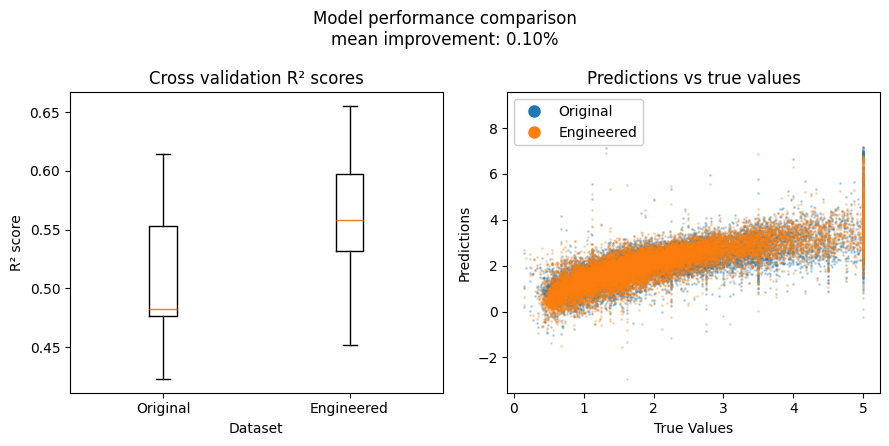

In [209]:
original_model = LinearRegression()
original_model.fit(original_housing_df.drop('MedHouseVal', axis=1), original_housing_df['MedHouseVal'])
original_predictions = original_model.predict(original_housing_df.drop('MedHouseVal', axis=1))

model = LinearRegression()
model.fit(housing_df.drop('MedHouseVal', axis=1), housing_df['MedHouseVal'])
predictions = model.predict(housing_df.drop('MedHouseVal', axis=1))

# Create boxplot comparing performance
data_to_plot = [scores_original, scores_engineered]
labels = ['Original', 'Engineered']

fig, axs = plt.subplots(1, 2, figsize=(9,4.5))

fig.suptitle(f'Model performance comparison\nmean improvement: {mean_improvement:.2f}%')

axs[0].set_title('Cross validation R² scores')
axs[0].boxplot(data_to_plot, tick_labels=labels)
axs[0].set_xlabel('Dataset')
axs[0].set_ylabel('R² score')

axs[1].set_title('Predictions vs true values')
axs[1].plot(
    original_housing_df['MedHouseVal'], original_predictions,
    'o', markersize=1, label='Original', alpha=0.25
)

axs[1].plot(
    housing_df['MedHouseVal'], predictions,
    'o', markersize=1, label='Engineered', alpha=0.25
)

axs[1].set_xlabel('True Values')
axs[1].set_ylabel('Predictions')

leg = axs[1].legend(loc='upper left', markerscale=8, framealpha=1)

for lh in leg.legend_handles: 
    lh.set_alpha(1)

plt.tight_layout()
plt.show()

## 3. Reflection

**Questions to consider**:

1. Which feature engineering techniques had the biggest impact on model performance?
2. Did adding more features always improve performance, or did some hurt it?
3. How might you further improve the engineered dataset?
4. What trade-offs did you consider (e.g., interpretability vs performance, complexity vs gains)?

**Your reflection**:

*Write your thoughts here...*

1- The log-transformations on highly skewed features (Population, AveRooms) had the biggest positive impact.

2-Not everything improved the model, base on skewness values help me see which model and which features need to be better.

4- Log-transforms and a few interactions improved performance while still keeping the model easy to interpret.